<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/CIFAR_10_2_tiny_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# import dependencies
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplollib and tqdm
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# check verstions
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


In [ ]:
# import helper function from github
import requests
from pathlib import Path

# download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exist")
else:
  print("Downloading helper_functions.py...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

# Data

## Getting dataset

In [ ]:
# setup training and testing datasets
from torchvision import datasets

train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
# check the class names in downloaded datasets
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# check the length of train and test datasets
len(train_data), len(test_data)

(50000, 10000)

In [ ]:
# check the first trainig sample
image, label = train_data[0]
image, label

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
# get corrosponding indexes
class_to_idx = train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
# check the input and output of the data
print(f"Image shape: {image.shape} -> [color_channels, width, height]")
print(f"Class names: {class_names[label]}")

Image shape: torch.Size([3, 32, 32]) -> [color_channels, width, height]
Class names: frog


## Visualizing data

Image shape: torch.Size([32, 32, 3])


(-0.5, 31.5, 31.5, -0.5)

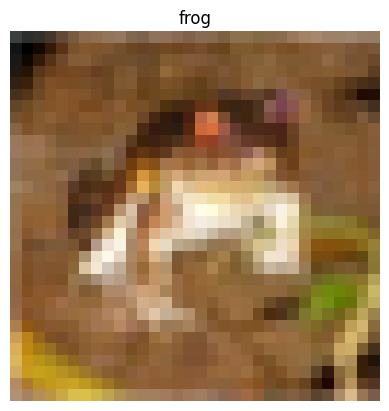

In [ ]:
# plot sample as it recived

image,label = train_data[0]
image = image.permute(1,2,0)
print(f"Image shape: {image.shape}")
plt.imshow(image)
plt.title(class_names[label])
plt.axis(False)

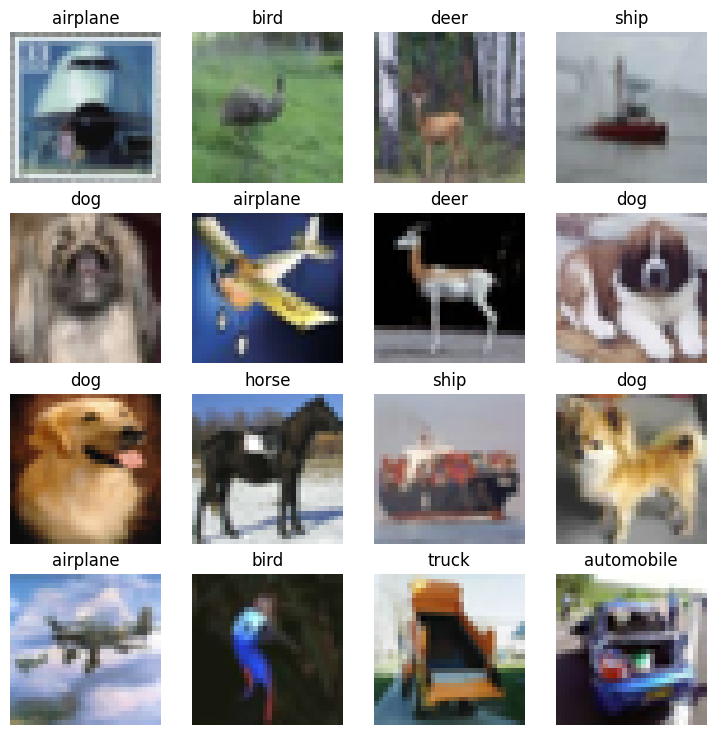

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, cols*rows+1):
  random_idx = torch.randint(1, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  img = torch.permute(img, (1,2,0))
  plt.imshow(img)
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoaders

In [ ]:
from torch.utils.data import DataLoader

# setup batch size
BATCH_SIZE = 32

# turn datasets into python iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f584dac80a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f584dac8f70>)

In [ ]:
# check data loader
print(f"Length of train dataloader: {len(train_dataloader)} batches of: {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of: {BATCH_SIZE}")

Length of train dataloader: 1563 batches of: 32
Length of test dataloader: 313 batches of: 32


In [ ]:
# check dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

Image shape: torch.Size([32, 32, 3])
Label: 8, Label size: torch.Size([])


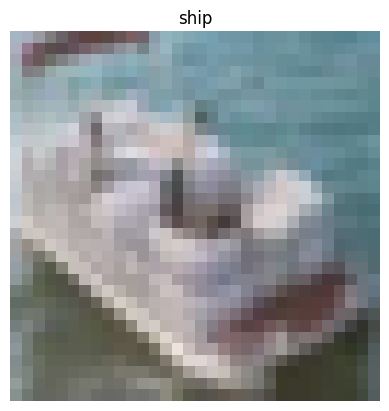

In [ ]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
img = torch.permute(img, (1,2,0))
plt.imshow(img)
plt.title(class_names[label])
plt.axis(False)
print(f"Image shape: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

# Model

In [ ]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CIFARModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU()
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU()
    )

    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU()
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.conv_block_3(x)
    print(x.shape)
    x = self.conv_block_4(x)
    print(x.shape)
    x = self.classifier(x)

    return x

## Checking the content of the model

In [ ]:
model_0 = CIFARModelV1(input_shape=3,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)

model_0

CIFARModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_block_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

In [ ]:
# rand_img = torch.randn(size=(3,32,32))
# rand_img.shape

torch.Size([3, 32, 32])

In [ ]:
# model_0(rand_img.unsqueeze(0).to(device))

torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 10, 16, 16])
torch.Size([1, 10, 16, 16])


tensor([[ 0.0029, -0.0056, -0.0111,  0.0021,  0.0036, -0.0446, -0.0394, -0.0015,
         -0.0003,  0.0118]], grad_fn=<AddmmBackward0>)

## Train model

In [ ]:
# setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# setup random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# setup epochs
epochs = 6

